In [21]:
import pystan
import pandas as pd
from bayesian_analysis import BayesianAnalysis, BayesianRevenue, BayesianConversion

In [22]:
pystan.__version__

'2.19.0.0'

In [23]:
sm_revenue = pystan.StanModel(file='revenue_model.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [24]:
boop = BayesianRevenue('data', 1, 1, sm_revenue)

In [78]:
df = pd.read_csv('../sevenpack/data/exp_385.csv')

In [80]:
from pandas import Timestamp
dt = pd.to_datetime(df['participation_timestamp_rounded_up'])
idx = dt<Timestamp('2020-02-01')
subxp = df.loc[idx]

In [86]:
unique_buckets = subxp.bucket.unique()

In [87]:
unique_buckets

array(['control', 'show_modal_forced_selection',
       'show_modal_optional_selection'], dtype=object)

In [88]:
results = []

In [89]:
len(subxp)

2057546

In [92]:
results = []
for bucket in unique_buckets:
    bucket_df = subxp.loc[subxp["bucket"] == bucket]
    res = boop._generate_posterior_distribution(bucket_df)
    results.append(res)

In [93]:
n = len(results)

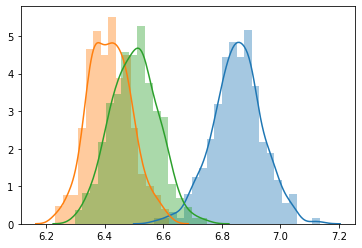

In [95]:
import seaborn as sns
sns.distplot(results[0])
sns.distplot(results[1])
sns.distplot(results[2])

In [96]:
def _calculate_expected_loss(res_lists: list, num_groups: int) -> list:
    loss_stats = []
    print(num_groups)
    if num_groups == 2:
        a = res_lists[0]
        b = res_lists[1]
        loss_a = np.mean(np.maximum(b - a, 0))
        loss_b = np.mean(np.maximum(a - b, 0))
        loss_stats.append(loss_a)
        loss_stats.append(loss_b)

    if num_groups == 3:
        a = res_lists[0]
        b = res_lists[1]
        c = res_lists[2]
        loss_a = np.mean(np.maximum(b - a, 0))
        loss_a = np.mean(np.maximum(loss_a, c - a))
        loss_b = np.mean(np.maximum(a - b, 0))
        loss_b = np.mean(np.maximum(loss_b, c - b))
        loss_c = np.mean(np.maximum(a - c, 0))
        loss_b = np.mean(np.maximum(loss_c, b - c))
        loss_stats.append(loss_a)
        loss_stats.append(loss_b)
        loss_stats.append(loss_c)

    if num_groups == 4:
        a = res_lists[0]
        b = res_lists[1]
        c = res_lists[2]
        d = res_lists[3]
        loss_a = np.mean(np.maximum(b - a, c - a, d - a, 0))
        loss_b = np.mean(np.maximum(a - b, c - b, d - b, 0))
        loss_c = np.mean(np.maximum(a - c, b - c, d - c, 0))
        loss_d = np.mean(np.maximum(a - d, b - d, c - d, 0))
        loss_stats.append(loss_a)
        loss_stats.append(loss_b)
        loss_stats.append(loss_c)
        loss_stats.append(loss_d)
    #raise ValueError(f'{num_groups} is misspecified') 

    return loss_stats


In [97]:
losses = _calculate_expected_loss(results, 3)

3


In [98]:
losses

[0.0002221755267113902, 0.3506679921265005, 0.35066799212650046]

In [61]:
losses = []

In [49]:
losses = []
for i in range(n):
    j = i+1
    while(j < n):
        diff = results[j] - results[i]
        print(f'i,j:{i, j}')
        if j == i+1:
            loss_i = np.maximum(diff, 0)
        else:
            loss_i = np.maximum(diff, loss_i)
        #print(diffs)
        j += 1
    loss_i = np.mean(loss_i)
    print(loss_i)
    losses.append(loss_i)
        

i,j:(0, 1)
i,j:(0, 2)
0.043910077988576816
i,j:(1, 2)
0.028211394601960805
0.028211394601960805


In [48]:
losses

[0.043910077988576816, 0.028211394601960805, 0.044726050752105055]

In [10]:
bucket_df = df.loc[df["bucket"] == unique_buckets[0]]
res = boop._generate_posterior_distribution(bucket_df)
results.append(res)

In [11]:
bucket_df = df.loc[df["bucket"] == unique_buckets[1]]
res = boop._generate_posterior_distribution(bucket_df)
results.append(res)

In [12]:
boop._generate_posterior_distribution_for_revenue(df)

AttributeError: 'BayesianRevenue' object has no attribute '_generate_posterior_distribution_for_revenue'

In [ ]:
df2 = pd.read_csv('../sevenpack/data/xp_432_cvr.csv')

In [ ]:
sm_conversion = pystan.StanModel(file = 'conversion_model.stan')

In [ ]:
boop2 = BayesianConversion('is_converted', 1, 1, sm_conversion)

In [ ]:
res = boop2._generate_posterior_distribution_for_conversions(df2)

In [ ]:
res

In [ ]:
sns.distplot(res)